In [13]:
from minisom import MiniSom
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
#penguins = pd.read_csv("daten/palmerpenguinsNorm.csv",decimal = ".")

import pandas as pd
import numpy as np
columns=['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove', 'target']
penguins_norm = pd.read_csv("daten/palmerpenguinsNorm.csv")
penguins = pd.read_csv("daten/palmerpenguins.csv")
target = penguins_norm['species'].values
#label_names = {1:'Kama', 2:'Rosa', 3:'Canadian'}
data = penguins_norm[penguins_norm.columns[2:-2]]
# data normalization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values

In [30]:
penguins.dtypes
data

array([[-0.88449874,  0.78544923, -1.41834665, -0.56414208],
       [-0.81112573,  0.1261879 , -1.06225022, -0.50170305],
       [-0.66437972,  0.43046236, -0.42127665, -1.18853234],
       ...,
       [ 1.04154272,  0.53188718, -0.56371522, -0.53292256],
       [ 1.26166175,  0.93758646,  0.64701263, -0.1270689 ],
       [ 1.15160224,  0.78544923, -0.20761879, -0.53292256]])

In [79]:
# Initialization and training
n_neurons = 9
m_neurons = 9
som = MiniSom(n_neurons, m_neurons, data.shape[1], sigma=1.5, learning_rate=.65, 
              neighborhood_function='gaussian', topology='rectangular')#, random_seed=0)

#som.pca_weights_init(data)
som.train(data, 1000, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.9914237859379355


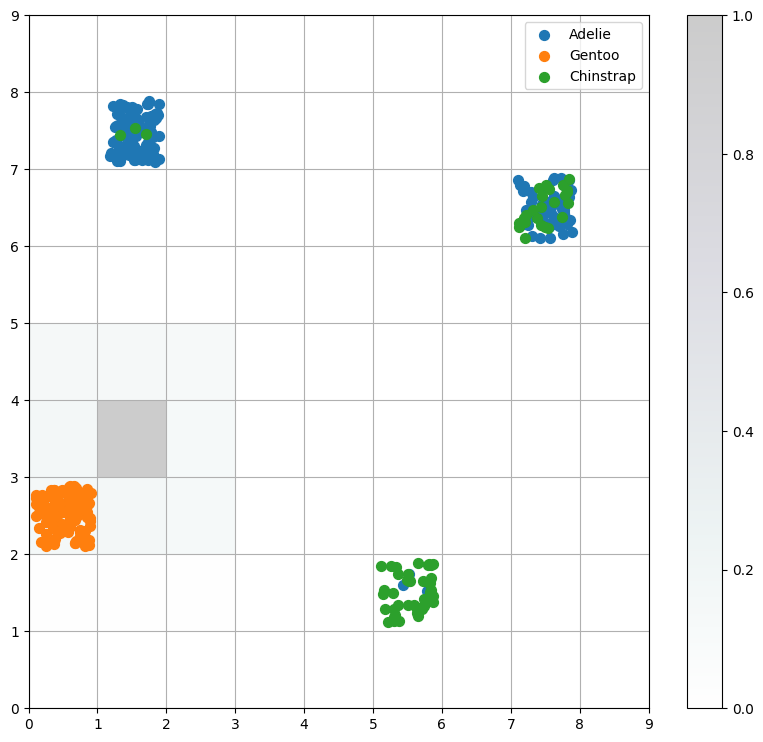

In [80]:
w_x, w_y = zip(*[som.winner(d) for d in data])
w_x = np.array(w_x)
w_y = np.array(w_y)

markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()
label_names = ["Adelie","Gentoo","Chinstrap"]

for c,species in enumerate(label_names):
#for c in np.unique(target):
    idx_target = target== species
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
#plt.savefig('resulting_images/som_seed.png')
plt.show()

In [13]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,342.000000
mean,0.429888,0.482282,0.490088,0.417154,2008.029240
std,0.198530,0.235094,0.238334,0.222765,0.817168
min,0.000000,0.000000,0.000000,0.000000,2007.000000
25%,0.259091,0.297619,0.305085,0.236111,2007.000000
50%,0.449091,0.500000,0.423729,0.375000,2008.000000
75%,0.596364,0.666667,0.694915,0.569444,2009.000000
max,1.000000,1.000000,1.000000,1.000000,2009.000000


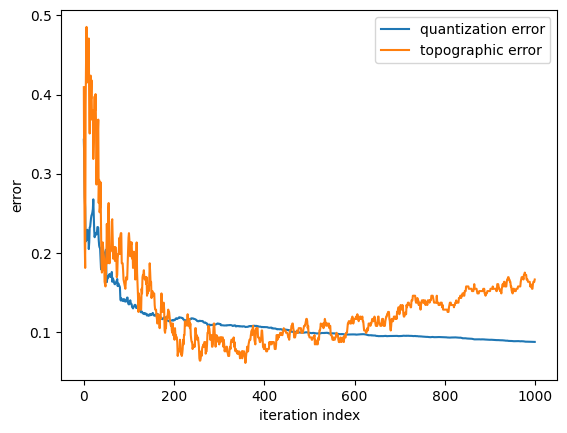

In [24]:
# Initialization and training
n_neurons = 9
m_neurons = 9
som = MiniSom(n_neurons, m_neurons, data.shape[1], sigma=1.5, learning_rate=.5, 
              neighborhood_function='gaussian', random_seed=0, topology='rectangular')

#som.pca_weights_init(data)

max_iter = 1000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(data))
    som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(data))
    t_error.append(som.topographic_error(data))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('error')
plt.xlabel('iteration index')
plt.legend()
plt.show()